In [1]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
import pandas as pd
import numpy as np
import string
import os.path
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import gridspec
import matplotlib.patches as mpatches
import attila_utils

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
def read_results(fpath='../../results/experimental/cell-based-assays.xlsx', sheet='Sheet2'):
    results = pd.read_excel(fpath, sheet, header=[0, 1, 2])
    results = results.set_index(('class', 'assay', 'concentration'))
    results = results.drop(results.columns[0], axis=1)
    results = results.transpose()
    results = results.rename_axis(['class', 'assay', 'concentration'], axis='index')
    results['conc'] = results.index.get_level_values('concentration')
    results = results.rename(index={'c4': 'c1', 'c5': 'c2', 'c6': 'c3'}, level=2)
    return(results)

results = read_results()
results

('class', 'assay', 'concentration')                                                Chenodiol (TUDCA)  \
class                                          assay                concentration                      
Exp2 Abeta induced toxicity primary neurons    MTT (viability)      c1                           NaN   
                                                                    c2                           NaN   
                                                                    c3                           NaN   
Exp3 Abeta Clearance BV2                       Abeta in SN          c1                           0.0   
                                                                    c2                           0.0   
...                                                                                              ...   
Exp8 trophic factor withdrawal primary neurons LDH (cell death)     c2                           0.0   
                                                                    c3                           0.0   
Exp9 Tau Agg cell-free                         Tau aggregation ΔRFU c1                           NaN   
                                                                    c2                           NaN   
                                                                    c3                           NaN   

('class', 'assay', 'concentration')                                                Cysteamine HCl (Cysteamine)  \
class                                          assay                concentration                                
Exp2 Abeta induced toxicity primary neurons    MTT (viability)      c1                                     NaN   
                                                                    c2                                     NaN   
                                                                    c3                                     NaN   
Exp3 Abeta Clearance BV2                       Abeta in SN          c1                                     0.0   
                                                                    c2                                     1.0   
...                                                                                                        ...   
Exp8 trophic factor withdrawal primary neurons LDH (cell death)     c2                                     0.0   
                                                                    c3                                     0.0   
Exp9 Tau Agg cell-free                         Tau aggregation ΔRFU c1                                     NaN   
                                                                    c2                                     NaN   
                                                                    c3                                     NaN   

('class', 'assay', 'concentration')                                                Arundine (3,3'-Diindolylmethane)  \
class                                          assay                concentration                                     
Exp2 Abeta induced toxicity primary neurons    MTT (viability)      c1                                          NaN   
                                                                    c2                                          NaN   
                                                                    c3                                          NaN   
Exp3 Abeta Clearance BV2                       Abeta in SN          c1                                          0.0   
                                                                    c2                                         -1.0   
...                                                                                                             ...   
Exp8 trophic factor withdrawal primary neurons LDH (cell death)     c2                                          0.0   
                                                                    c3                       

In [3]:
results = results.dropna(axis=0)
results.loc[:, 'class'] = pd.Categorical(results.index.get_level_values('class'))
new_class_names = [r'A$\beta$ clearance', r'A$\beta$ secretion', 'Tau phosphorylation', 'LPS neuroinflammation', 'Neurogenesis, neurite outgrowth', 'Trophic factor withdrawal']
new_class_names = [X + ')  ' + c for X, c in zip(list(string.ascii_uppercase)[:len(new_class_names)], new_class_names)]
mapper = dict(zip(results['class'].cat.categories, new_class_names))
results = results.drop('class', axis=1)
results = results.rename(mapper, axis=0, level=0)
results = results.rename(dict(zip(results.columns, ['Chenodiol', 'Cysteamine', 'Arundine'])), axis=1)
results

/var/folders/49/kvzc40q90ygdgsxzf49p1wjmj6bgxh/T/ipykernel_2407/2796743617.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results.loc[:, 'class'] = pd.Categorical(results.index.get_level_values('class'))


('class', 'assay', 'concentration')                           Chenodiol  \
class                         assay            concentration              
A)  A$\beta$ clearance        Abeta in SN      c1                   0.0   
                                               c2                   0.0   
                                               c3                   0.0   
                              Abeta in Lysate  c1                   2.0   
                                               c2                   0.0   
...                                                                 ...   
F)  Trophic factor withdrawal MTT (viability)  c2                   0.0   
                                               c3                   0.0   
                              LDH (cell death) c1                   3.0   
                                               c2                   0.0   
                                               c3                   0.0   

('class', 'assay', 'concentration')                           Cysteamine  \
class                         assay            concentration               
A)  A$\beta$ clearance        Abeta in SN      c1                    0.0   
                                               c2                    1.0   
                                               c3                    0.0   
                              Abeta in Lysate  c1                    0.0   
                                               c2                   -1.0   
...                                                                  ...   
F)  Trophic factor withdrawal MTT (viability)  c2                   -2.0   
                                               c3                   -1.0   
                              LDH (cell death) c1                    0.0   
                                               c2                    0.0   
                                               c3                    0.0   

('class', 'assay', 'concentration')                           Arundine conc  
class                         assay            concentration                 
A)  A$\beta$ clearance        Abeta in SN      c1                  0.0   c4  
                                               c2                 -1.0   c5  
                                               c3                  0.0   c6  
                              Abeta in Lysate  c1                  0.0   c4  
                                               c2                  1.0   c5  
...                                                                ...  ...  
F)  Trophic factor withdrawal MTT (viability)  c2                  0.0   c2  
                                               c3                  0.0   c3  
                              LDH (cell death) c1                  0.0   c1  
                                               c2                  0.0   c2  
                                               c3                  0.0   c3  

[69 rows x 4 columns]

Ideal effect is the direction of effect of an ideal, hypothetical, neuroprotective drug on a given assay.

In [4]:
fpath = '../../results/2022-09-21-cell-based-assays/protect_sign.csv'
if os.path.exists(fpath):
    protect_sign = pd.read_csv(fpath, index_col=['class', 'assay', 'concentration']).squeeze()
else:
    protect_sign = pd.Series(0, index=results.index, dtype='int8')
    protect_sign.to_csv(fpath)

colname = 'ideal effect: increase (1) or decrease (-1)'
protect_supp_tab = protect_sign.groupby(axis=0, level=['class', 'assay']).first().to_frame(colname)
protect_supp_tab.to_csv('../../results/2022-09-21-cell-based-assays/protect_supp_tab.csv')
protect_supp_tab

ideal effect: increase (1) or decrease (-1)
class                               assay                                                               
A)  A$\beta$ clearance              Abeta in Lysate                                                    1
                                    Abeta in SN                                                       -1
                                    ratio                                                             -1
B)  A$\beta$ secretion              Ab1-38                                                            -1
                                    Ab1-40                                                            -1
                                    Ab1-42                                                            -1
C)  Tau phosphorylation             pTau231                                                           -1
                                    ratio                                                             -1
                                    total Tau                                                          1
D)  LPS neuroinflammation           IL-10                                                             -1
                                    IL-1b                                                             -1
                                    IL-6                                                              -1
                                    KC/GRO                                                            -1
                                    MTT                                                                1
                                    TNF-a                                                             -1
E)  Neurogenesis, neurite outgrowth BrdU positive neurons                                              1
                                    average longest neurite                                            1
                                    number of branches                                                 1
                                    total neurite area                                                 1
F)  Trophic factor withdrawal       LDH (cell death)                                                  -1
                                    MTT (viability)                                                    1
                                    PI (cell death)                                                   -1
                                    YOPRO (apoptosis)                                                 -1

In [5]:
def results2protective(results, protect_sign=protect_sign):
    results_protect = results.drop('conc', axis=1).apply(lambda col: col * protect_sign.to_list(), axis=0)
    results_protect['conc'] = results.conc
    return(results_protect)

results_protect = results2protective(results, protect_sign=protect_sign)
results_protect

('class', 'assay', 'concentration')                           Chenodiol  \
class                         assay            concentration              
A)  A$\beta$ clearance        Abeta in SN      c1                  -0.0   
                                               c2                  -0.0   
                                               c3                  -0.0   
                              Abeta in Lysate  c1                   2.0   
                                               c2                   0.0   
...                                                                 ...   
F)  Trophic factor withdrawal MTT (viability)  c2                   0.0   
                                               c3                   0.0   
                              LDH (cell death) c1                  -3.0   
                                               c2                  -0.0   
                                               c3                  -0.0   

('class', 'assay', 'concentration')                           Cysteamine  \
class                         assay            concentration               
A)  A$\beta$ clearance        Abeta in SN      c1                   -0.0   
                                               c2                   -1.0   
                                               c3                   -0.0   
                              Abeta in Lysate  c1                    0.0   
                                               c2                   -1.0   
...                                                                  ...   
F)  Trophic factor withdrawal MTT (viability)  c2                   -2.0   
                                               c3                   -1.0   
                              LDH (cell death) c1                   -0.0   
                                               c2                   -0.0   
                                               c3                   -0.0   

('class', 'assay', 'concentration')                           Arundine conc  
class                         assay            concentration                 
A)  A$\beta$ clearance        Abeta in SN      c1                 -0.0   c4  
                                               c2                  1.0   c5  
                                               c3                 -0.0   c6  
                              Abeta in Lysate  c1                  0.0   c4  
                                               c2                  1.0   c5  
...                                                                ...  ...  
F)  Trophic factor withdrawal MTT (viability)  c2                  0.0   c2  
                                               c3                  0.0   c3  
                              LDH (cell death) c1                 -0.0   c1  
                                               c2                 -0.0   c2  
                                               c3                 -0.0   c3  

[69 rows x 4 columns]

In [6]:
plt.rcParams['figure.facecolor'] = 'lightgray'

In [7]:
gb_class = results.groupby('class')
assays_per_class = {name: len(df) / 3 for name, df in gb_class}
assays_per_class

{'A)  A$\\beta$ clearance': 3.0,
 'B)  A$\\beta$ secretion': 3.0,
 'C)  Tau phosphorylation': 3.0,
 'D)  LPS neuroinflammation': 6.0,
 'E)  Neurogenesis, neurite outgrowth': 4.0,
 'F)  Trophic factor withdrawal': 4.0}

['named-figure/cell-based-assays-absolute.png',
 'named-figure/cell-based-assays-absolute.pdf']

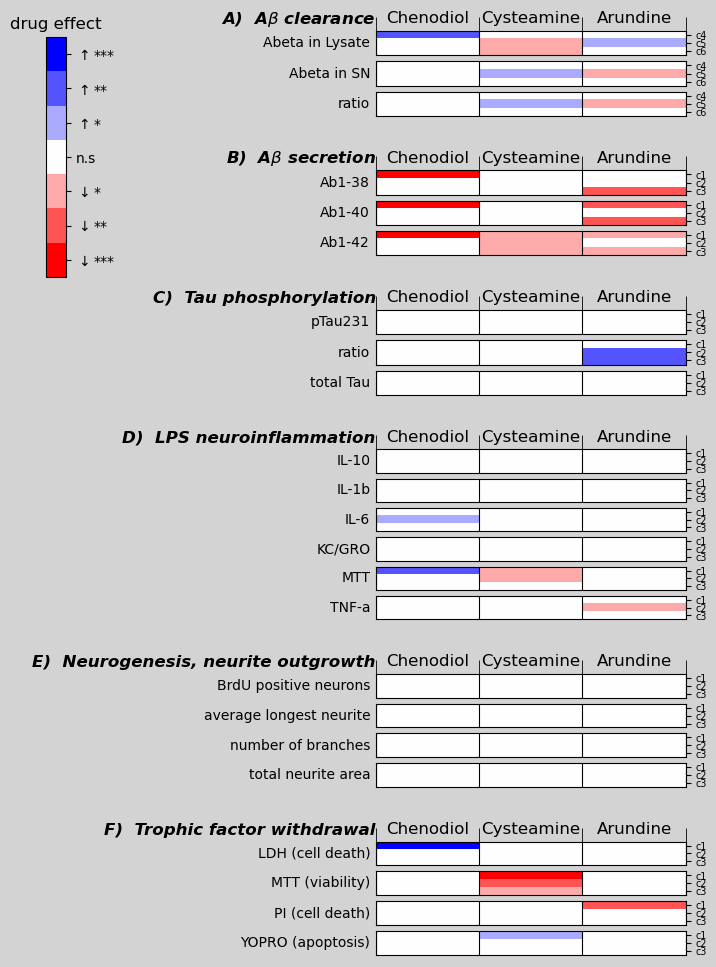

In [8]:
anonymizer = {
    'Chenodiol': 'drug A',
    'Cysteamine': 'drug B',
    'Arundine': 'drug C',
    'conc': 'conc'
}

def process_class(classname, classdata, i, fig, my_cmap, vmin, vmax, results=results):
    n_assays = int(len(classdata) / 3)
    first_assay_name = classdata.index.get_level_values('assay')[0]
    outer_grid = gridspec.GridSpec(len(gb_class), 1, height_ratios = list(assays_per_class.values()), figure=fig, hspace=0.5) 
    inner_gs = gridspec.GridSpecFromSubplotSpec(n_assays, 1, subplot_spec=outer_grid[i], hspace=0.25)
    gb_assay = classdata.groupby('assay')
    for j, zipitem in enumerate(zip(inner_gs, gb_assay)):
        cell, gbitem = zipitem
        ax = plt.subplot(cell)
        assay_name, assay_data = gbitem
        plot_assay(ax, assay_name, assay_data, my_cmap, vmin, vmax)
        ax.tick_params(top=True, bottom=False, labeltop=True, labelbottom=False, length=0, which='both', axis='x')
        if j == 0:
            ax.set_title(classname, loc='left', y=0.95, horizontalalignment='right', fontstyle='italic', fontweight='bold')
            ax.set_xticks(range(3))
            ax.set_xticklabels(results.columns[:-1], fontsize=12)#, rotation=-45, horizontalalignment='left')
            ax.tick_params(top=True, bottom=False, labeltop=True, labelbottom=False, length=10, which='minor')
    return(ax)

def plot_assay(axi, assay_name, assay_data, my_cmap, vmin, vmax):
        axi.imshow(assay_data.iloc[:, range(3)], aspect='auto', interpolation='none', cmap=my_cmap, vmin=vmin, vmax=vmax)
        axi.set_xticks(range(3))
        axi.set_yticks(range(assay_data.shape[0]))
        axi.set_yticklabels(assay_data.conc, fontsize=7)
        axi.set_ylabel(assay_name, rotation=0, verticalalignment='center', horizontalalignment='right')
        axi.tick_params(right=True, left=False, labelright=True, labelleft=False)
        axi.set_xticks([])
        axi.set_xticks(np.arange(4) - 0.5, minor=True)
        axi.grid(axis='x', which='minor', color='black')
        return(axi)

projector = {3: 1, 2: 1, 1: 1, 0: 0, -1: -1, -2: -1, -3: -3}
def simplify_results(results, projector=projector):
    val = results.drop('conc', axis=1).applymap(lambda x: projector[x] if not pd.isna(x) else x)
    val['conc'] = results.conc
    return(val)

def my_figure(protective=False, simplify=False, protective_cmap='RdYlGn', anonymize=False):
    res = results_protect if protective else results
    res = res.rename(anonymizer, axis=1) if anonymize else res
    res = simplify_results(res) if simplify else res
    gb_class = res.groupby('class')
    cmap = protective_cmap if protective else 'bwr_r'
    #cmap = 'PiYG' if protective else 'bwr_r'
    n_levels = 3 if simplify else 7
    my_cmap = matplotlib.colors.ListedColormap(matplotlib.colormaps[cmap](np.linspace(0, 1, n_levels)))
    vmin = -1.5 if simplify else -3.5
    vmax = 1.5 if simplify else 3.5
    fig = plt.figure(figsize=(4, 12))
    for i, classinfo in enumerate(gb_class):
        classname, classdata = classinfo
        axi = process_class(classname, classdata, i, fig, my_cmap=my_cmap, vmin=vmin, vmax=vmax, results=res)
    #my_patch = mpatches.Patch(color='green', alpha=0.5, label='TWAS2+ gene set')
    cb_ax = fig.add_axes([-0.7, 0.675, 0.05, 0.20])
    cm = plt.cm.ScalarMappable(cmap=my_cmap)
    cm.set_clim(vmin=vmin, vmax=vmax)
    fig.colorbar(cm, cax=cb_ax)
    cb_ax.set_yticks(np.arange(-1 if simplify else -3, 2 if simplify else 4, 1))
    ticklab_abs = [r'$\downarrow$', r'n.s', r'$\uparrow$'] if simplify else [r'$\downarrow$***', r'$\downarrow$**', r'$\downarrow$*', r'n.s', r'$\uparrow$*', r'$\uparrow$**', r'$\uparrow$***']
    ticklab_prot = [r'adverse', r'n.s', r'protective'] if simplify else [r'*** adverse', r'**', r'*', r'n.s', r'*', r'**', r'*** protective']
    cb_ax.set_yticklabels(ticklab_prot if protective else ticklab_abs)
    cb_ax.set_title('drug effect')
    return(fig)

fig = my_figure(protective=False)
fig
attila_utils.savefig(fig, 'cell-based-assays-absolute')

['named-figure/cell-based-assays.png', 'named-figure/cell-based-assays.pdf']

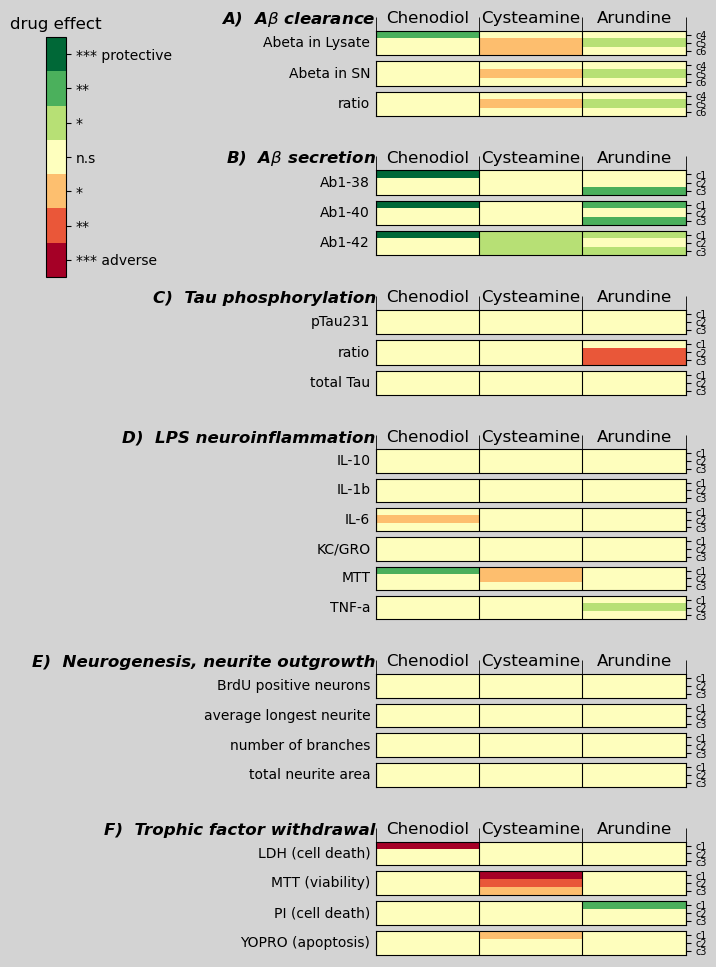

In [9]:
fig = my_figure(protective=True)
fig
attila_utils.savefig(fig, 'cell-based-assays')

['named-figure/cell-based-assays-simplified.png',
 'named-figure/cell-based-assays-simplified.pdf']

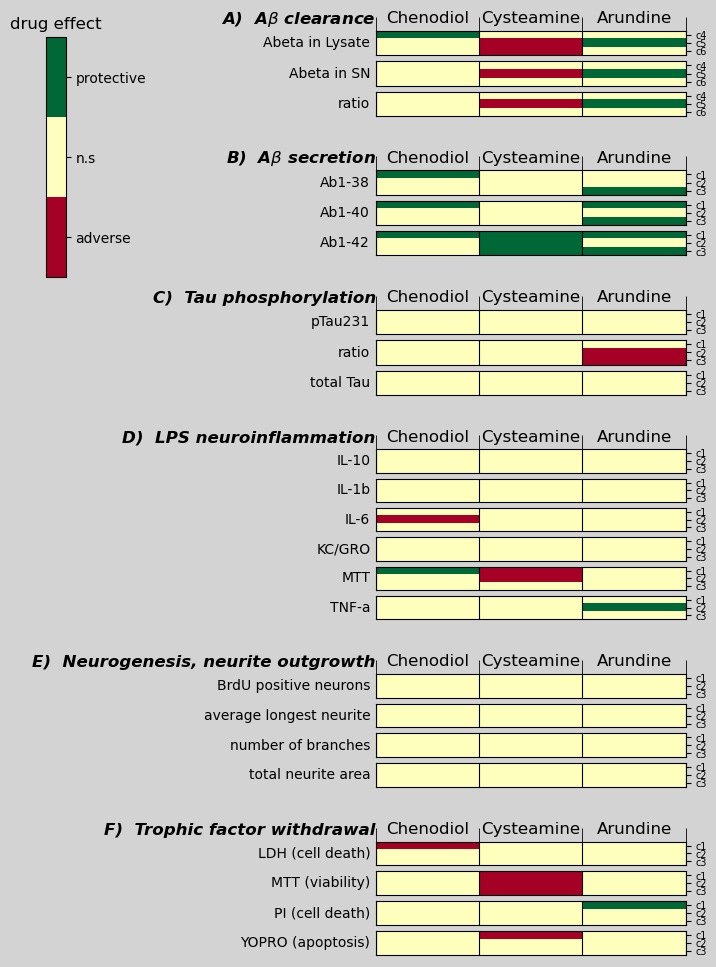

In [10]:
fig = my_figure(protective=True, simplify=True)
fig
attila_utils.savefig(fig, 'cell-based-assays-simplified')

['named-figure/cell-based-assays-simplified-anonimized.png',
 'named-figure/cell-based-assays-simplified-anonimized.pdf']

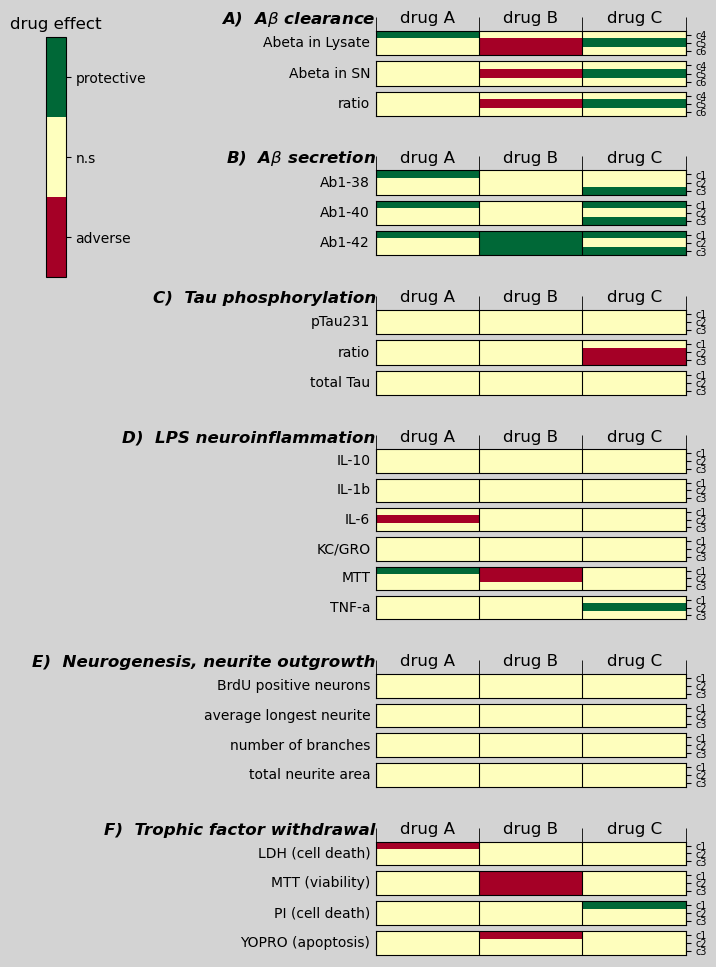

In [11]:
fig = my_figure(protective=True, simplify=True, anonymize=True)
fig
attila_utils.savefig(fig, 'cell-based-assays-simplified-anonimized')

## All results

In [12]:
CO28151 = pd.read_excel('../../results/experimental/CO28151_outcome summary-v2.xlsx', 'CO28151')
CO28151.loc[:, 'name'] = CO28151.name.str.strip()

def clean_adj_p(pstr):
    if pstr == '>0,99':
        p = 0.99
    elif pstr == '<0,001':
        p = 0.00099
    else:
        p = np.float64(pstr)
    return(p)

CO28151['Adjusted P Value'] = CO28151['Adjusted P Value'].apply(clean_adj_p)
CO28151['Summary'] = [0 if s == 'ns' else np.sign(fx) * len(s) for s, fx in zip(CO28151['Summary'], CO28151['Mean Diff,'])]
CO28151

,class,assay,assay1,TI,name,Bonferroni's multiple comparisons test,"Mean Diff,","95,00% CI of diff,",Below threshold?,Summary,Adjusted P Value,conc
0,Exp3 Abeta Clearance BV2,Abeta in SN,Abeta celarance supernatant,TI2,Phenamil methanesulfonate salt,VC vs. c1,7889.0000,4674 to 11104,Yes,3.0,0.00099,c1
1,Exp3 Abeta Clearance BV2,Abeta in SN,Abeta celarance supernatant,TI2,Phenamil methanesulfonate salt,VC vs. c2,1328.0000,-1887 to 4543,No,0.0,0.88000,c2
2,Exp3 Abeta Clearance BV2,Abeta in SN,Abeta celarance supernatant,TI2,Phenamil methanesulfonate salt,VC vs. c3,4365.0000,1150 to 7580,Yes,2.0,0.00600,c3
3,Exp3 Abeta Clearance BV2,Abeta in SN,Abeta celarance supernatant,TI3,Benzamil hydrochloride hydrate,VC vs. c1,7398.0000,4830 to 9966,Yes,3.0,0.00099,c1
4,Exp3 Abeta Clearance BV2,Abeta in SN,Abeta celarance supernatant,TI3,Benzamil hydrochloride hydrate,VC vs. c2,6674.0000,4105 to 9242,Yes,3.0,0.00099,c2
...,...,...,...,...,...,...,...,...,...,...,...,...
370,Exp6 LPS Neuroinflamamtion BV2,KC/GRO,LPS inflammation KC/GRO,TI13,Liraglutide,LPS vs. c2,0.5517,"-1,490 to 2,593",No,0.0,0.99000,c2
371,Exp6 LPS Neuroinflamamtion BV2,KC/GRO,LPS inflammation KC/GRO,TI13,Liraglutide,LPS vs. c3,0.2617,"-1,780 to 2,303",No,0.0,0.99000,c3
372,Exp6 LPS Neuroinflamamtion BV2,MTT,LPS inflammation MTT,TI13,Liraglutide,LPS vs. c1,-3.0000,"-14,20 to 8,199",No,0.0,0.99000,c1
373,Exp6 LPS Neuroinflamamtion BV2,MTT,LPS inflammation MTT,TI13,Liraglutide,LPS vs. c2,-6.5000,"-17,70 to 4,699",No,0.0,0.60000,c2


In [13]:
d = {
    '***↑': 3,
    '**↑': 2,
    '*↑': 1,
    'ns': 0,
    '*↓': -1,
    '**↓': -2,
    '***↓': -3,
    'not performed': 9,
}

fpath = '../../resources/cell-based-assays/CO25360_Overview results_all.xlsx'
df = pd.read_excel(fpath, 'Tabelle1', skiprows=5, index_col=[2, 3], header=list(range(3)))
df = df.drop(df.columns[0:2], axis=1)
df = pd.DataFrame([pd.Categorical(df[n], categories=d.keys()).rename_categories(d) for n in df], index=df.index, columns=df.columns)
df = df.applymap(lambda x: np.nan if x == 9 else x)
fpath = fpath.replace('.xlsx', '-clean.xlsx')
df.to_excel(fpath, 'Sheet1')
# Manually edited Excel doc and saved it as the fpath below
# 1: remove empty first row (a bug of ExcelWriter with multilevel columns)
# 2: label index levels as class, assay, concentration
fpath = '../../resources/cell-based-assays/CO25360_Overview results_all-clean1.xlsx'
results_1 = read_results(fpath, 'Sheet1')
results_1

/var/folders/49/kvzc40q90ygdgsxzf49p1wjmj6bgxh/T/ipykernel_2407/1217180550.py:15: FutureWarning: The behavior of DataFrame([categorical, ...]) is deprecated and in a future version will be changed to match the behavior of DataFrame([any_listlike, ...]). To retain the old behavior, pass as a dictionary DataFrame({col: categorical, ..})
  df = pd.DataFrame([pd.Categorical(df[n], categories=d.keys()).rename_categories(d) for n in df], index=df.index, columns=df.columns)


('class', 'assay', 'concentration')                                                VALPROIC ACID  \
class                                          assay                concentration                  
Exp2 Abeta induced toxicity primary neurons    MTT (viability)      c1                       0.0   
                                                                    c2                       0.0   
                                                                    c3                       0.0   
Exp3 Abeta Clearance BV2                       Abeta in SN          c1                       0.0   
                                                                    c2                       1.0   
...                                                                                          ...   
Exp8 trophic factor withdrawal primary neurons LDH (cell death)     c2                       0.0   
                                                                    c3                       0.0   
Exp9 Tau Agg cell-free                         Tau aggregation ΔRFU c1                       0.0   
                                                                    c2                       0.0   
                                                                    c3                      -2.0   

('class', 'assay', 'concentration')                                                SALBUTAMOL  \
class                                          assay                concentration               
Exp2 Abeta induced toxicity primary neurons    MTT (viability)      c1                    0.0   
                                                                    c2                    0.0   
                                                                    c3                    0.0   
Exp3 Abeta Clearance BV2                       Abeta in SN          c1                    0.0   
                                                                    c2                    0.0   
...                                                                                       ...   
Exp8 trophic factor withdrawal primary neurons LDH (cell death)     c2                    0.0   
                                                                    c3                    0.0   
Exp9 Tau Agg cell-free                         Tau aggregation ΔRFU c1                    0.0   
                                                                    c2                    0.0   
                                                                    c3                    0.0   

('class', 'assay', 'concentration')                                                SILDENAFIL  \
class                                          assay                concentration               
Exp2 Abeta induced toxicity primary neurons    MTT (viability)      c1                    0.0   
                                                                    c2                    0.0   
                                                                    c3                    0.0   
Exp3 Abeta Clearance BV2                       Abeta in SN          c1                    0.0   
                                                                    c2                    0.0   
...                                                                                       ...   
Exp8 trophic factor withdrawal primary neurons LDH (cell death)     c2                    0.0   
                                                                    c3                    0.0   
Exp9 Tau Agg cell-free                         Tau aggregation ΔRFU c1                    0.0   
                                                                    c2                    0.0   
                                                                    c3                   -1.0   

('class', 'assay', 'concentration')                                                PROBENECID  \
class                                          assay                concentrat

In [14]:
results_CO28151 = CO28151.pivot(index=['class', 'assay', 'conc'], columns='name', values='Summary')
results_CO28151
#results_1 = read_results(sheet='Sheet3')
results_all = pd.concat([results_1, results_CO28151], axis=1)
results_all

VALPROIC ACID  \
class                                          assay                                    
Exp2 Abeta induced toxicity primary neurons    MTT (viability)      c1            0.0   
                                                                    c2            0.0   
                                                                    c3            0.0   
Exp3 Abeta Clearance BV2                       Abeta in SN          c1            0.0   
                                                                    c2            1.0   
...                                                                               ...   
Exp8 trophic factor withdrawal primary neurons LDH (cell death)     c2            0.0   
                                                                    c3            0.0   
Exp9 Tau Agg cell-free                         Tau aggregation ΔRFU c1            0.0   
                                                                    c2            0.0   
                                                                    c3           -2.0   

                                                                        SALBUTAMOL  \
class                                          assay                                 
Exp2 Abeta induced toxicity primary neurons    MTT (viability)      c1         0.0   
                                                                    c2         0.0   
                                                                    c3         0.0   
Exp3 Abeta Clearance BV2                       Abeta in SN          c1         0.0   
                                                                    c2         0.0   
...                                                                            ...   
Exp8 trophic factor withdrawal primary neurons LDH (cell death)     c2         0.0   
                                                                    c3         0.0   
Exp9 Tau Agg cell-free                         Tau aggregation ΔRFU c1         0.0   
                                                                    c2         0.0   
                                                                    c3         0.0   

                                                                        SILDENAFIL  \
class                                          assay                                 
Exp2 Abeta induced toxicity primary neurons    MTT (viability)      c1         0.0   
                                                                    c2         0.0   
                                                                    c3         0.0   
Exp3 Abeta Clearance BV2                       Abeta in SN          c1         0.0   
                                                                    c2         0.0   
...                                                                            ...   
Exp8 trophic factor withdrawal primary neurons LDH (cell death)     c2         0.0   
                                                                    c3         0.0   
Exp9 Tau Agg cell-free                         Tau aggregation ΔRFU c1         0.0   
                                                                    c2         0.0   
                                                                    c3        -1.0   

                                                                        PROBENECID  \
class                                          assay                                 
Exp2 Abeta induced toxicity primary neurons    MTT (viability)      c1         0.0   
                                                                    c2         0.0   
                                                                    c3         0.0   
Exp3 Abeta Clearance BV2                       Abeta in SN          c1         0.0   
                                                                    c2        -1.0   
...                                                                       

We see that `results_1` contains 75 / 3 = 25 assays and 

In [15]:
d = {'results_1': results_1, 'results_CO28151': results_CO28151}
print('Number of assays:')
print({k: np.int64(df.shape[0] / 3) for k, df in d.items()})
print('Number of drugs:')
print({k: np.int64(df.shape[1]) for k, df in d.items()})

Number of assays:
{'results_1': 25, 'results_CO28151': 11}
Number of drugs:
{'results_1': 28, 'results_CO28151': 13}


In [16]:
fpath_1 = '../../results/2022-09-21-cell-based-assays/protect_sign_1.csv'
protect_sign_1 = pd.read_csv(fpath_1, index_col=['class', 'assay', 'concentration']).squeeze()
results_all_protect = results2protective(results_all, protect_sign=protect_sign_1)
results_all_protect

VALPROIC ACID  \
class                                          assay                                    
Exp2 Abeta induced toxicity primary neurons    MTT (viability)      c1            0.0   
                                                                    c2            0.0   
                                                                    c3            0.0   
Exp3 Abeta Clearance BV2                       Abeta in SN          c1           -0.0   
                                                                    c2           -1.0   
...                                                                               ...   
Exp8 trophic factor withdrawal primary neurons LDH (cell death)     c2           -0.0   
                                                                    c3           -0.0   
Exp9 Tau Agg cell-free                         Tau aggregation ΔRFU c1           -0.0   
                                                                    c2           -0.0   
                                                                    c3            2.0   

                                                                        SALBUTAMOL  \
class                                          assay                                 
Exp2 Abeta induced toxicity primary neurons    MTT (viability)      c1         0.0   
                                                                    c2         0.0   
                                                                    c3         0.0   
Exp3 Abeta Clearance BV2                       Abeta in SN          c1        -0.0   
                                                                    c2        -0.0   
...                                                                            ...   
Exp8 trophic factor withdrawal primary neurons LDH (cell death)     c2        -0.0   
                                                                    c3        -0.0   
Exp9 Tau Agg cell-free                         Tau aggregation ΔRFU c1        -0.0   
                                                                    c2        -0.0   
                                                                    c3        -0.0   

                                                                        SILDENAFIL  \
class                                          assay                                 
Exp2 Abeta induced toxicity primary neurons    MTT (viability)      c1         0.0   
                                                                    c2         0.0   
                                                                    c3         0.0   
Exp3 Abeta Clearance BV2                       Abeta in SN          c1        -0.0   
                                                                    c2        -0.0   
...                                                                            ...   
Exp8 trophic factor withdrawal primary neurons LDH (cell death)     c2        -0.0   
                                                                    c3        -0.0   
Exp9 Tau Agg cell-free                         Tau aggregation ΔRFU c1        -0.0   
                                                                    c2        -0.0   
                                                                    c3         1.0   

                                                                        PROBENECID  \
class                                          assay                                 
Exp2 Abeta induced toxicity primary neurons    MTT (viability)      c1         0.0   
                                                                    c2         0.0   
                                                                    c3         0.0   
Exp3 Abeta Clearance BV2                       Abeta in SN          c1        -0.0   
                                                                    c2         1.0   
...                                                                       

In [17]:
agg_assay = results_all_protect.groupby(axis=0, level=1, sort=False).mean().transpose()
agg_assay
agg_experiment = results_all_protect.groupby(axis=0, level=0, sort=False).mean().transpose()
agg_experiment

class,Exp2 Abeta induced toxicity primary neurons,Exp3 Abeta Clearance BV2,Exp4 Abeta secretion H4,Exp5 Tau phosphorylation,Exp6 LPS Neuroinflamamtion BV2,Exp7 Neurogenesis and neurite outgrowth primary neurons,Exp8 trophic factor withdrawal primary neurons,Exp9 Tau Agg cell-free
VALPROIC ACID,0.000000,0.111111,0.000000,0.000000,-0.222222,0.000000,0.750000,0.666667
SALBUTAMOL,0.000000,-0.111111,-0.111111,-0.111111,1.222222,0.166667,0.000000,0.000000
SILDENAFIL,0.000000,-0.222222,-0.111111,0.000000,0.333333,0.000000,0.000000,0.333333
PROBENECID,0.000000,0.111111,0.000000,-0.222222,0.277778,0.000000,0.250000,0.666667
MONTELUKAST,0.000000,0.000000,0.000000,0.000000,1.166667,-0.083333,-1.583333,1.000000
FELODIPINE,-2.000000,1.222222,0.666667,0.000000,1.647059,0.083333,0.000000,0.000000
LEVETIRACETAM,0.000000,0.444444,-0.111111,-0.333333,0.833333,-0.083333,0.000000,0.333333
NIFEDIPINE,-1.666667,-1.000000,-2.555556,0.111111,-0.117647,-0.083333,-0.416667,1.333333
ACITRETIN,0.000000,-0.777778,-1.666667,1.625000,-0.611111,0.166667,-0.166667,2.333333
DASATINIB,-2.666667,0.000000,0.555556,0.000000,-0.764706,-2.083333,-0.916667,2.666667


In [18]:
def my_heatmap(df):
    fig, ax = plt.subplots()
    im = ax.imshow(X=df,cmap='RdYlGn')
    cbar = ax.figure.colorbar(im, ax=ax, orientation='vertical')
    ax_cbar = fig.get_axes()[1]
    ax_cbar.set_ylabel('Neuroprotectivity')
    ax.set_xticks(np.arange(len(df.columns)))
    fontsize = 6
    #ax.tick_params(which='minor', length=0)
    ax.set_xticks(np.arange(len(df.columns)) - 0.5, minor=True)
    ax.set_xticklabels(df.columns, rotation=90, fontsize=fontsize)
    ax.set_yticks(np.arange(len(df.index)))
    ax.set_yticklabels(df.index, fontsize=fontsize)
    ax.set_yticks(np.arange(len(df.index)) - 0.5, minor=True)
    ax.grid(which='minor', color="w", linestyle='-', linewidth=1)
    ax.tick_params(which="minor", bottom=False, left=False)
    ax.spines[:].set_visible(False)
    return((fig, ax))

['named-figure/heatmap-agg-assay.png', 'named-figure/heatmap-agg-assay.pdf']

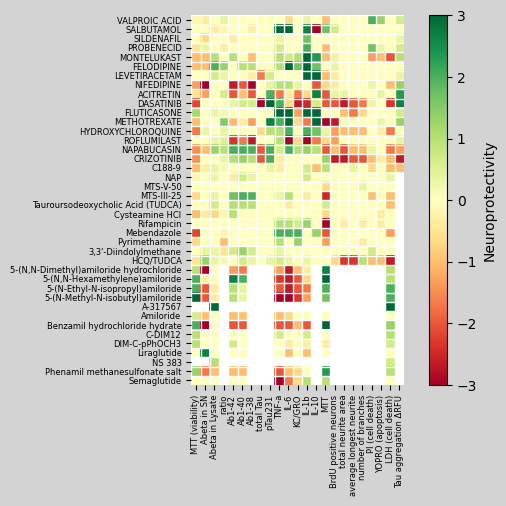

In [19]:
fig, ax = my_heatmap(agg_assay)
attila_utils.savefig(fig, 'heatmap-agg-assay')

['named-figure/heatmap-agg-experiment.png',
 'named-figure/heatmap-agg-experiment.pdf']

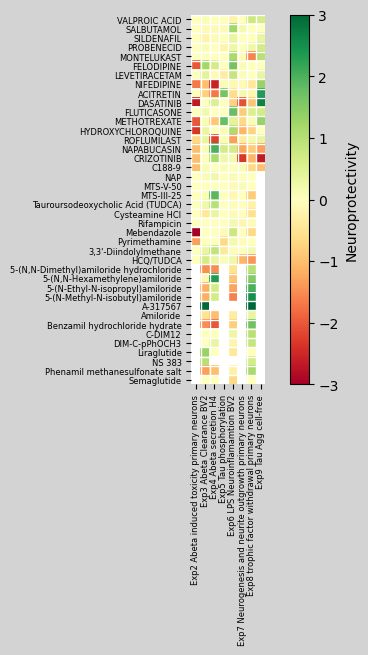

In [20]:
fig, ax = my_heatmap(agg_experiment)
attila_utils.savefig(fig, 'heatmap-agg-experiment')

In [21]:
{c: i for c, i in zip(agg_experiment.columns, np.arange(agg_experiment.shape[1]))}

{'Exp2 Abeta induced toxicity primary neurons': 0,
 'Exp3 Abeta Clearance BV2': 1,
 'Exp4 Abeta secretion H4': 2,
 'Exp5 Tau phosphorylation': 3,
 'Exp6 LPS Neuroinflamamtion BV2': 4,
 'Exp7 Neurogenesis and neurite outgrowth primary neurons': 5,
 'Exp8 trophic factor withdrawal primary neurons': 6,
 'Exp9 Tau Agg cell-free': 7}

In [22]:
def score_drugs(aggdf, ix=[1, 2, 4], weights=[1, 1, 1]):
    df = aggdf.iloc[:, ix]
    weights = [w / sum(weights) * 3 for w in weights]
    l = [w * df[s] for s, w in zip(df, weights)]
    df = pd.concat(l, axis=1)
    s = df.sum(1)
    s = s.sort_values(ascending=False)
    return(s)

scores_experiment = score_drugs(agg_experiment)
scores_experiment

FELODIPINE                                 3.535948
A-317567                                   3.000000
NAPABUCASIN                                2.777778
FLUTICASONE                                2.000000
MTS-III-25                                 1.882353
HYDROXYCHLOROQUINE                         1.450980
CRIZOTINIB                                 1.277778
Tauroursodeoxycholic Acid (TUDCA)          1.277778
3,3'-Diindolylmethane                      1.277778
5-(N,N-Hexamethylene)amiloride             1.233333
HCQ/TUDCA                                  1.222222
LEVETIRACETAM                              1.166667
MONTELUKAST                                1.166667
NS 383                                     1.000000
SALBUTAMOL                                 1.000000
Liraglutide                                0.933333
Mebendazole                                0.750000
NAP                                        0.444444
PROBENECID                                 0.388889
C-DIM12     

['named-figure/ranked-drugs.png', 'named-figure/ranked-drugs.pdf']

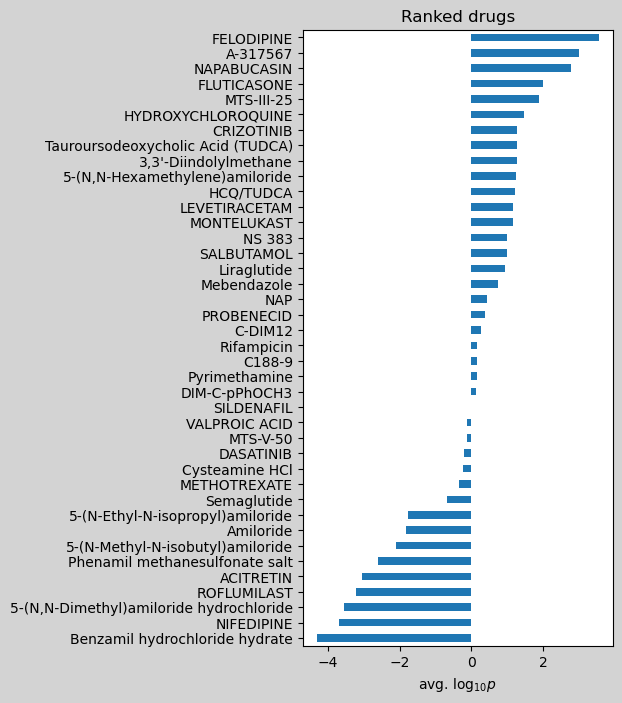

In [23]:
fig, ax = plt.subplots(figsize=(4, 8))
scores_experiment.iloc[::-1].plot(kind='barh', ax=ax)
ax.set_title('Ranked drugs')
ax.set_xlabel(r'avg. $\log_{10} p$')
attila_utils.savefig(fig, 'ranked-drugs')

In [24]:
%connect_info

{
  "shell_port": 63643,
  "iopub_port": 63644,
  "stdin_port": 63645,
  "control_port": 63647,
  "hb_port": 63646,
  "ip": "127.0.0.1",
  "key": "9de2db67-2818d0359608aaf45bfd3773",
  "transport": "tcp",
  "signature_scheme": "hmac-sha256",
  "kernel_name": ""
}

Paste the above JSON into a file, and connect with:
    $> jupyter <app> --existing <file>
or, if you are local, you can connect with just:
    $> jupyter <app> --existing kernel-69088af8-7eba-49c3-8570-c63ef5d3c203.json
or even just:
    $> jupyter <app> --existing
if this is the most recent Jupyter kernel you have started.
